# Data Exploration with Pandas

## Load the `python` modules

In [1]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt

#from sklearn import datasets
from sklearn.datasets import load_iris

%matplotlib inline

### Load the dataset

In [2]:
iris = load_iris()

#### Explore the information within the dataset:

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

A sample of the dataset's information:

```python
'data': array([[5.1, 3.5, 1.4, 0.2],
              ...
              [5.9, 3. , 5.1, 1.8]]),
              
'target': array([0, 0, 0, ..., 1, 1, 1, ..., 2, 2, 2]),

'target_names': array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),

'feature_names': ['sepal length (cm)',
                  'sepal width (cm)',
                  'petal length (cm)',
                  'petal width (cm)'],
  
'filename': 'iris.csv',
```

#### Extract some of this information:

In [4]:
# the names of the columns (features)
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# the names of the target classes:
iris.target_names
target_names = iris.target_names
print(target_names)

['setosa' 'versicolor' 'virginica']


In [6]:
# the target classes coding is accessed as:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Convert the dataset into a pandas dataframe:

# Table 3.1: Common DataFrame Operations

| DESCRIPTION |CODE EXAMPLES |
|:-------------|:-------------|
|Extract a range of rows using row numbers |`df[2:4]`|
| | `df.iloc[2:4]` |
|Extract a single row using row number | `df.iloc[2]`|
|Extract a range of rows and range of columns | `df.iloc[2:4, 1:4]`|
|Extract a range of rows and specific columns using positional values | `df.iloc[2:4, [1,3]]`|
|Extract specific row(s) and column(s)| `df.iloc[[2,4], [1,3]]` |
|Extract a range of rows using labels | `df['20190601':'20190603']`|
|Extract a single row based on its label | `df.loc['20190601'] `|
|Extract specific row(s) using their labels | `df.loc[[date1,date2]]`|
|Extract specific row(s) and column(s) using their labels | `df.loc[[date1,date2], ['A','C']]`|
| | `df.loc[[date1,date2], 'A':'C']` |
|Extract a range of rows and columns using their labels | `df.loc[date1:date2, 'A':'C']` |

In [7]:
# convert the dataset into a pandas dataframe (just a matter of taste!)
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [8]:
iris_df.index

RangeIndex(start=0, stop=150, step=1)

In [9]:
iris_df.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
dtype: bool

In [10]:
iris_df.isnull().sum(axis=1).loc[:10]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [11]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [12]:
iris_df.isnull().mean()*100

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

In [13]:
iris_df.values

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
iris_df.shape

(150, 4)

In [15]:
iris_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

#### Check if there are duplicate entries:

In [16]:
iris_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [17]:
duplicates = iris_df.duplicated()
iris_df[duplicates]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
142,5.8,2.7,5.1,1.9


#### Removing duplicate rows

**`CAUTION`: if necessary, depends on the case study**
```python
iris_df.drop_duplicates(inplace=True)
```

#### Display the FIRST five entries of the dataframe:

In [18]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Display the LAST five entries of the dataframe:

In [19]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


#### Change the names of the columns (features):

In [20]:
iris_features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
iris_df.columns = iris_features

### Add a column of the target classes to the dataframe:

In [21]:
iris_df["target"] = iris.target
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Display selected columns only:

In [22]:
iris_df.sepal_length

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [23]:
iris_df['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [24]:
iris_df[['sepal_length', 'sepal_width']]

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [25]:
# grouped selected columns:
iris_df[iris_features]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Display selected entries only:

In [26]:
iris_df.index

RangeIndex(start=0, stop=150, step=1)

#### Extract rows based on row number:

In [27]:
iris_df.iloc[0]

sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
target          0.0
Name: 0, dtype: float64

In [28]:
iris_df.iloc[1]

sepal_length    4.9
sepal_width     3.0
petal_length    1.4
petal_width     0.2
target          0.0
Name: 1, dtype: float64

In [29]:
iris_df.iloc[0:3]

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [30]:
iris_df.iloc[0:12:3]

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
3,4.6,3.1,1.5,0.2,0
6,4.6,3.4,1.4,0.3,0
9,4.9,3.1,1.5,0.1,0


In [31]:
iris_df.iloc[-1]

sepal_length    5.9
sepal_width     3.0
petal_length    5.1
petal_width     1.8
target          2.0
Name: 149, dtype: float64

### Slicing Based on Row and Column Numbers

In [32]:
iris_df.iloc[2:4, 1:4]

,sepal_width,petal_length,petal_width
2,3.2,1.3,0.2
3,3.1,1.5,0.2


In [33]:
iris_df.iloc[[2,4], [1,3]]

,sepal_width,petal_width
2,3.2,0.2
4,3.6,0.2


In [34]:
iris_df.loc[0]

sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
target          0.0
Name: 0, dtype: float64

In [35]:
iris_df.loc[0, ['sepal_length', 'petal_width']]

sepal_length    5.1
petal_width     0.2
Name: 0, dtype: float64

In [36]:
iris_df.loc[0:3, ['sepal_length', 'petal_width']]

,sepal_length,petal_width
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2


In [37]:
iris_df.loc[0:3, 'sepal_length':'petal_width']

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


#### Selecting a Single Cell in a DataFrame:

In [38]:
iris_df.at[2, 'sepal_length']

4.7

In [39]:
iris_df.at[3, 'petal_length']

1.5

In [40]:
iris_df.sepal_length[0]

5.1

### Selecting Based on Cell Value

In [41]:
iris_df[(iris_df.sepal_length > 6.8) & (iris_df.petal_length > 6.0)]

,sepal_length,sepal_width,petal_length,petal_width,target
105,7.6,3.0,6.6,2.1,2
107,7.3,2.9,6.3,1.8,2
109,7.2,3.6,6.1,2.5,2
117,7.7,3.8,6.7,2.2,2
118,7.7,2.6,6.9,2.3,2
122,7.7,2.8,6.7,2.0,2
130,7.4,2.8,6.1,1.9,2
131,7.9,3.8,6.4,2.0,2
135,7.7,3.0,6.1,2.3,2


In [42]:
iris_df[iris_df.sepal_length > 7.4]

,sepal_length,sepal_width,petal_length,petal_width,target
105,7.6,3.0,6.6,2.1,2
117,7.7,3.8,6.7,2.2,2
118,7.7,2.6,6.9,2.3,2
122,7.7,2.8,6.7,2.0,2
131,7.9,3.8,6.4,2.0,2
135,7.7,3.0,6.1,2.3,2


### Add a column for the target classes that contains the names of the species:

#### First way:

In [43]:
# add a target column with the target names
iris_df['species'] = iris_df['target']
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [44]:
# change the 0, 1, 2 coding to the species name:
iris_df['species'].replace([0, 1, 2], target_names, inplace=True)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


#### An alternative way:

In [45]:
iris_df['species_alt'] = iris_df.target
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species,species_alt
0,5.1,3.5,1.4,0.2,0,setosa,0
1,4.9,3.0,1.4,0.2,0,setosa,0
2,4.7,3.2,1.3,0.2,0,setosa,0
3,4.6,3.1,1.5,0.2,0,setosa,0
4,5.0,3.6,1.4,0.2,0,setosa,0


In [46]:
iris_df.loc[iris_df.species_alt == 0, 'species_alt'] = 'sentosa'
iris_df.loc[iris_df.species_alt == 1, 'species_alt'] = 'versicolor'
iris_df.loc[iris_df.species_alt == 2, 'species_alt'] = 'virginica'
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species,species_alt
0,5.1,3.5,1.4,0.2,0,setosa,sentosa
1,4.9,3.0,1.4,0.2,0,setosa,sentosa
2,4.7,3.2,1.3,0.2,0,setosa,sentosa
3,4.6,3.1,1.5,0.2,0,setosa,sentosa
4,5.0,3.6,1.4,0.2,0,setosa,sentosa


#### A more `pythonian` way:

In [47]:
iris_df['species_alt2'] = [iris.target_names[x] for x in iris.target]
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target,species,species_alt,species_alt2
0,5.1,3.5,1.4,0.2,0,setosa,sentosa,setosa
1,4.9,3.0,1.4,0.2,0,setosa,sentosa,setosa
2,4.7,3.2,1.3,0.2,0,setosa,sentosa,setosa
3,4.6,3.1,1.5,0.2,0,setosa,sentosa,setosa
4,5.0,3.6,1.4,0.2,0,setosa,sentosa,setosa
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,virginica,virginica
146,6.3,2.5,5.0,1.9,2,virginica,virginica,virginica
147,6.5,3.0,5.2,2.0,2,virginica,virginica,virginica
148,6.2,3.4,5.4,2.3,2,virginica,virginica,virginica


### Remove columns or rows:

In [48]:
iris_df.drop('species_alt2', axis=1)

,sepal_length,sepal_width,petal_length,petal_width,target,species,species_alt
0,5.1,3.5,1.4,0.2,0,setosa,sentosa
1,4.9,3.0,1.4,0.2,0,setosa,sentosa
2,4.7,3.2,1.3,0.2,0,setosa,sentosa
3,4.6,3.1,1.5,0.2,0,setosa,sentosa
4,5.0,3.6,1.4,0.2,0,setosa,sentosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,virginica
146,6.3,2.5,5.0,1.9,2,virginica,virginica
147,6.5,3.0,5.2,2.0,2,virginica,virginica
148,6.2,3.4,5.4,2.3,2,virginica,virginica


In [49]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species,species_alt,species_alt2
0,5.1,3.5,1.4,0.2,0,setosa,sentosa,setosa
1,4.9,3.0,1.4,0.2,0,setosa,sentosa,setosa
2,4.7,3.2,1.3,0.2,0,setosa,sentosa,setosa
3,4.6,3.1,1.5,0.2,0,setosa,sentosa,setosa
4,5.0,3.6,1.4,0.2,0,setosa,sentosa,setosa


In [50]:
iris_df.drop(iris_df.columns[-1], axis=1)

,sepal_length,sepal_width,petal_length,petal_width,target,species,species_alt
0,5.1,3.5,1.4,0.2,0,setosa,sentosa
1,4.9,3.0,1.4,0.2,0,setosa,sentosa
2,4.7,3.2,1.3,0.2,0,setosa,sentosa
3,4.6,3.1,1.5,0.2,0,setosa,sentosa
4,5.0,3.6,1.4,0.2,0,setosa,sentosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,virginica
146,6.3,2.5,5.0,1.9,2,virginica,virginica
147,6.5,3.0,5.2,2.0,2,virginica,virginica
148,6.2,3.4,5.4,2.3,2,virginica,virginica


In [51]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species,species_alt,species_alt2
0,5.1,3.5,1.4,0.2,0,setosa,sentosa,setosa
1,4.9,3.0,1.4,0.2,0,setosa,sentosa,setosa
2,4.7,3.2,1.3,0.2,0,setosa,sentosa,setosa
3,4.6,3.1,1.5,0.2,0,setosa,sentosa,setosa
4,5.0,3.6,1.4,0.2,0,setosa,sentosa,setosa


In [52]:
iris_df = iris_df.drop(['species_alt','species_alt2'], axis=1)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [53]:
pd.get_dummies(iris_df, drop_first=False)

,sepal_length,sepal_width,petal_length,petal_width,target,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,0,1,0,0
1,4.9,3.0,1.4,0.2,0,1,0,0
2,4.7,3.2,1.3,0.2,0,1,0,0
3,4.6,3.1,1.5,0.2,0,1,0,0
4,5.0,3.6,1.4,0.2,0,1,0,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0,0,1
146,6.3,2.5,5.0,1.9,2,0,0,1
147,6.5,3.0,5.2,2.0,2,0,0,1
148,6.2,3.4,5.4,2.3,2,0,0,1


### Descriptive Statistics on the DataFrame

In [54]:
# Check the data type of each field:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [55]:
iris_df.mean()

/var/folders/b3/t81f1yl52fq1b2tnbmrsb_dr0000gn/T/ipykernel_32732/3124939555.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  iris_df.mean()


sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
target          1.000000
dtype: float64

In [56]:
# compute the mean for each column:
iris_df.mean(0)

/var/folders/b3/t81f1yl52fq1b2tnbmrsb_dr0000gn/T/ipykernel_32732/2019084987.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  iris_df.mean(0)


sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
target          1.000000
dtype: float64

In [57]:
# compute the mean for each row:
iris_df.mean(1)

/var/folders/b3/t81f1yl52fq1b2tnbmrsb_dr0000gn/T/ipykernel_32732/3383987320.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  iris_df.mean(1)


0      2.04
1      1.90
2      1.88
3      1.88
4      2.04
       ... 
145    3.84
146    3.54
147    3.74
148    3.86
149    3.56
Length: 150, dtype: float64

In [58]:
iris_df['sepal_length'].mean()

5.843333333333335

#### Check if the instance is a dataframe or a series:

In [59]:
isinstance(iris_df, pd.DataFrame)

True

In [60]:
isinstance(iris_df, pd.Series)

False

#### The function `describe()`

In [61]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [62]:
iris_df.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [63]:
iris_df.describe().iloc[:, :2]

,sepal_length,sepal_width
count,150.000000,150.000000
mean,5.843333,3.057333
std,0.828066,0.435866
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


#### The function `sort_values()`

In [64]:
iris_df.sort_values(by='sepal_length', ascending=True).head()

,sepal_length,sepal_width,petal_length,petal_width,target,species
13,4.3,3.0,1.1,0.1,0,setosa
42,4.4,3.2,1.3,0.2,0,setosa
38,4.4,3.0,1.3,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
41,4.5,2.3,1.3,0.3,0,setosa


In [65]:
iris_df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,target
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.0
versicolor,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0


### Transpose the dataframe:

In [66]:
iris_df.T

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
sepal_length,5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal_width,3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
petal_length,1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
petal_width,0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8
target,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
species,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,...,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica


In [67]:
gg = iris_df.transpose()
gg.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
sepal_length,5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal_width,3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
petal_length,1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
petal_width,0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8
target,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [68]:
gg.index

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target',
       'species'],
      dtype='object')

In [69]:
gg.columns

RangeIndex(start=0, stop=150, step=1)

In [70]:
gg.iloc[0:3, 1:5]

,1,2,3,4
sepal_length,4.9,4.7,4.6,5.0
sepal_width,3.0,3.2,3.1,3.6
petal_length,1.4,1.3,1.5,1.4


# Plots with Seaborn

### Box plots

A box plot gives an idea of the distribution and skewness of a variable, based on statistical parameters, and indicates the presence of outliers (denoted by circles or dots).

https://seaborn.pydata.org/generated/seaborn.boxplot.html

/Users/dheervarsani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_length'>

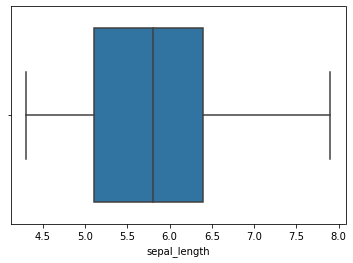

In [71]:
sns.boxplot(iris_df['sepal_length'])

<AxesSubplot:>

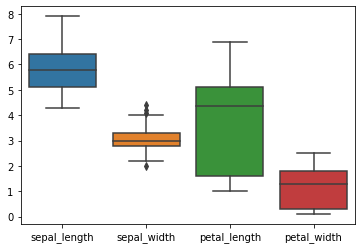

In [72]:
sns.boxplot(data=iris_df[iris_features])

### Kernel density estimate

The kernel density estimate is a plot for visualizing the probability distribution of a continuous variable.

https://seaborn.pydata.org/generated/seaborn.kdeplot.html

<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

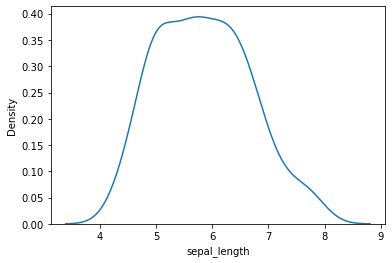

In [73]:
sns.kdeplot(iris_df['sepal_length'])

<AxesSubplot:ylabel='Density'>

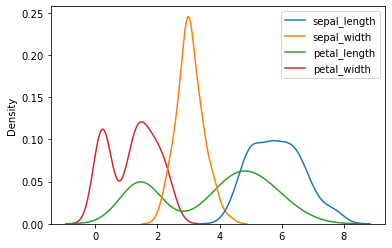

In [74]:
sns.kdeplot(data=iris_df[iris_features])

### Violin plot

A violin plot merges the box plot with the kernel density plot, with the shape of the violin representing the frequency distribution.

https://seaborn.pydata.org/generated/seaborn.violinplot.html

<AxesSubplot:xlabel='species', ylabel='petal_width'>

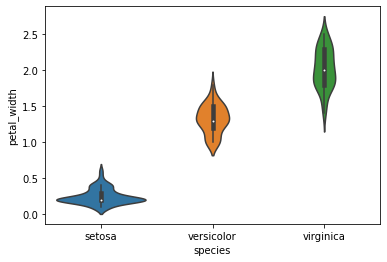

In [75]:
sns.violinplot(x='species', y='petal_width', data=iris_df)

<AxesSubplot:xlabel='species', ylabel='petal_width'>

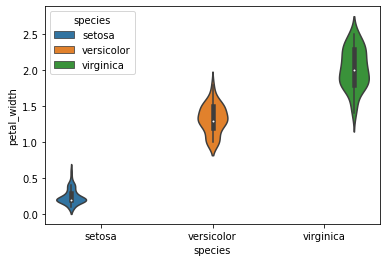

In [76]:
sns.violinplot(x='species', y='petal_width', data=iris_df, hue='species')

<AxesSubplot:>

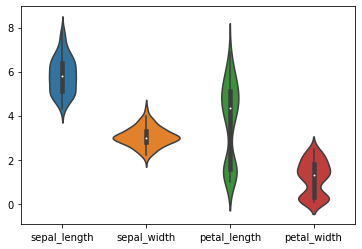

In [77]:
sns.violinplot(data=iris_df[iris_features])

### Count plots

Count plots are used to plot categorical variables, with the length of the bars representing the number of observations for each unique value of the variable.

https://seaborn.pydata.org/generated/seaborn.countplot.html

<AxesSubplot:xlabel='species', ylabel='count'>

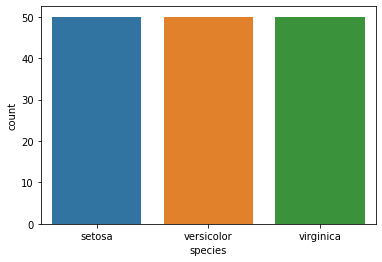

In [78]:
sns.countplot(x=iris_df['species'])

### Plot pair-wise the features of the dataframe

A pair plot is one that shows bivariate relationships between all possible pairs of variables in the dataset.

Notice that you do not have to supply any column names as arguments since all the variables in the dataset are considered automatically for plotting.

https://seaborn.pydata.org/generated/seaborn.pairplot.html

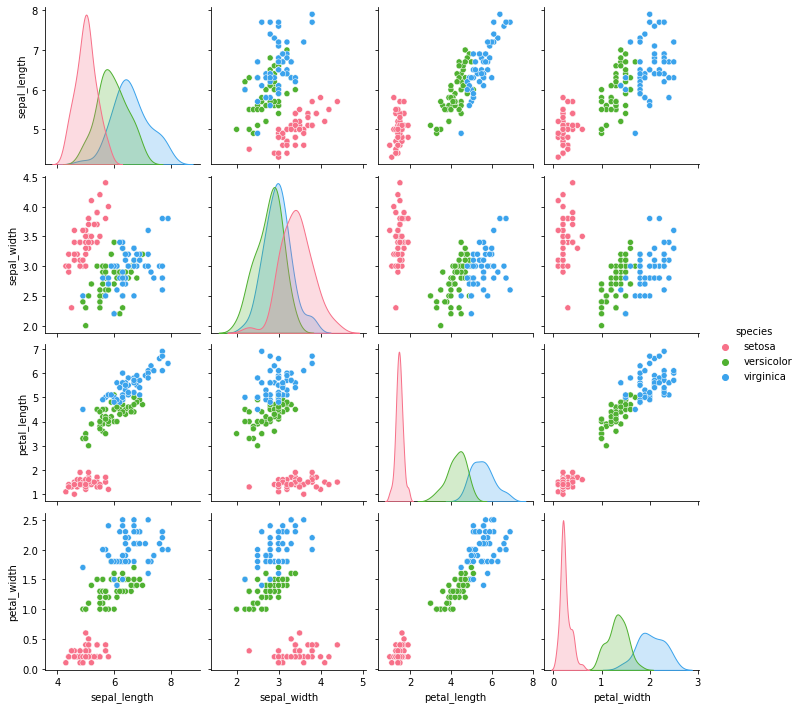

In [79]:
sns.pairplot(iris_df, vars = iris_df.columns[0:4], hue='species', palette='husl')

### Joint plot

The joint plot displays the relationship between two variables as well as the individual distribution of the variables.

https://seaborn.pydata.org/generated/seaborn.jointplot.html

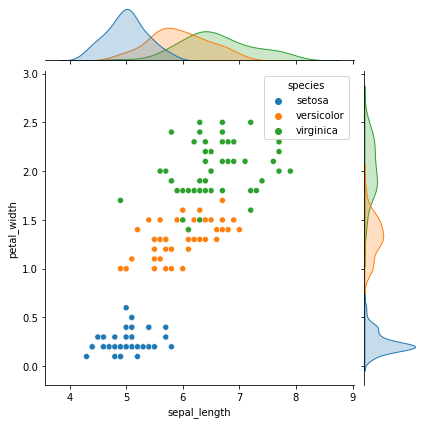

In [80]:
sns.jointplot(x='sepal_length', y='petal_width', hue='species', data=iris_df)

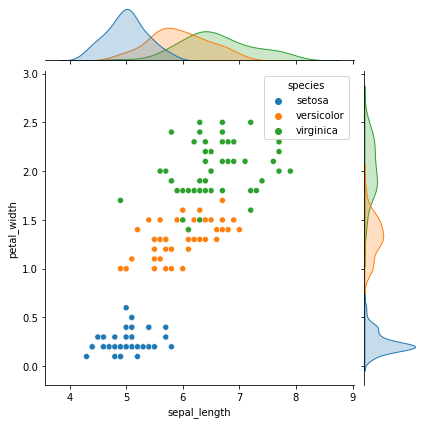

In [81]:
sns.jointplot(x='sepal_length', y='petal_width', hue='species', data=iris_df, kind='scatter')

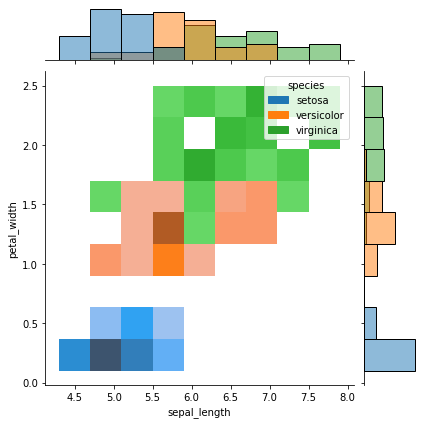

In [82]:
sns.jointplot(x='sepal_length', y='petal_width', hue='species', data=iris_df, kind='hist')

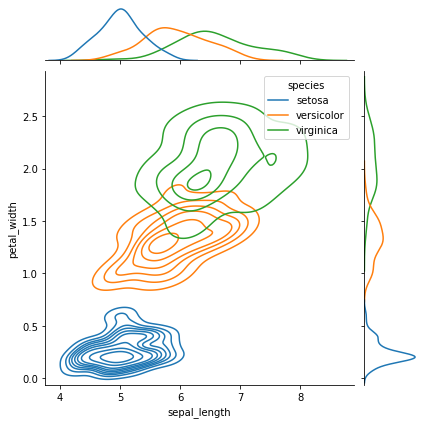

In [83]:
sns.jointplot(x='sepal_length', y='petal_width', hue='species', data=iris_df, kind='kde')

### Correlation matrix in heatmap format

https://seaborn.pydata.org/generated/seaborn.heatmap.html

<AxesSubplot:>

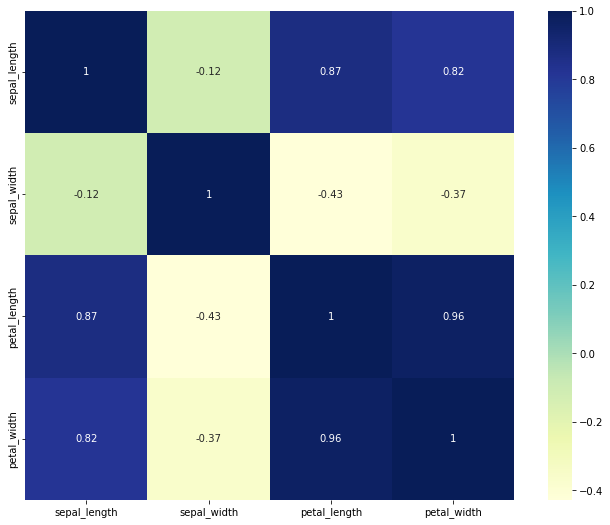

In [84]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(iris_df[iris_features].corr(), annot=True, cmap='YlGnBu', square=True)

### Strip plot

A strip plot is similar to a scatter plot. The difference lies in the type of variables used in a strip plot. While a scatter plot has both variables as continuous, a strip plot plots one categorical variable against one continuous variable.

https://seaborn.pydata.org/generated/seaborn.stripplot.html

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

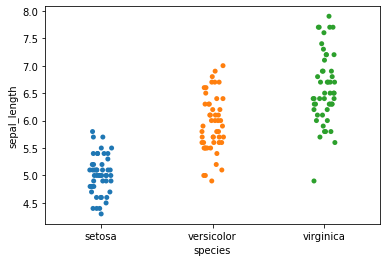

In [85]:
sns.stripplot(x='species', y='sepal_length', data=iris_df)

<AxesSubplot:>

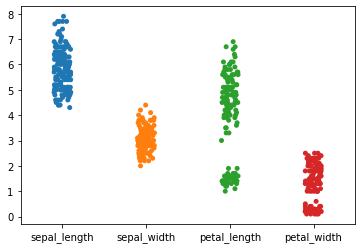

In [86]:
sns.stripplot(data=iris_df[iris_features])

### Swarm plot

A swarm plot is similar to a strip plot, the difference being that the points in a swarm plot are not overlapping like those in a strip plot. With the points more spread out, we get a better idea of the distribution of the continuous variable.

https://seaborn.pydata.org/generated/seaborn.swarmplot.html

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

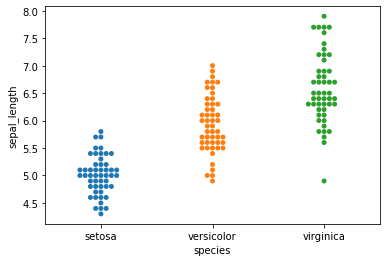

In [87]:
sns.swarmplot(x='species', y='sepal_length', data=iris_df)

### Distibution plot

https://seaborn.pydata.org/generated/seaborn.displot.html

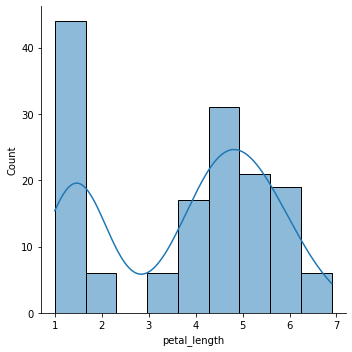

In [88]:
sns.displot(data=iris_df, x='petal_length', kde=True)

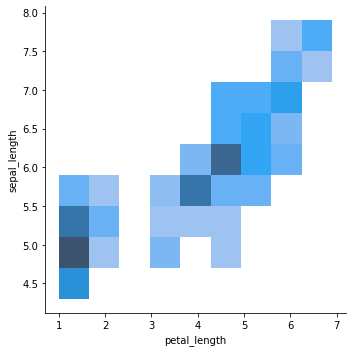

In [89]:
sns.displot(data=iris_df, x='petal_length', y='sepal_length')

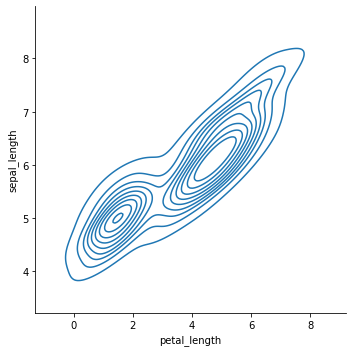

In [90]:
sns.displot(data=iris_df, x='petal_length', y='sepal_length', kind="kde")

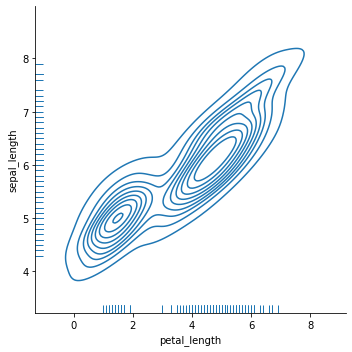

In [91]:
g = sns.displot(data=iris_df, x='petal_length', y='sepal_length', kind='kde', rug=True)

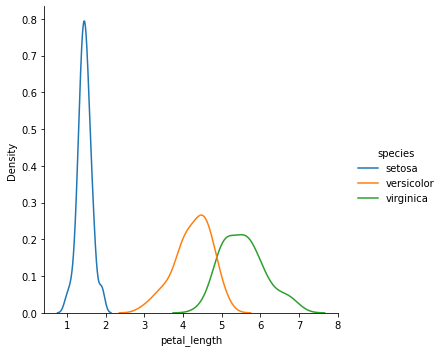

In [92]:
sns.displot(data=iris_df, x='petal_length', hue='species', kind='kde')

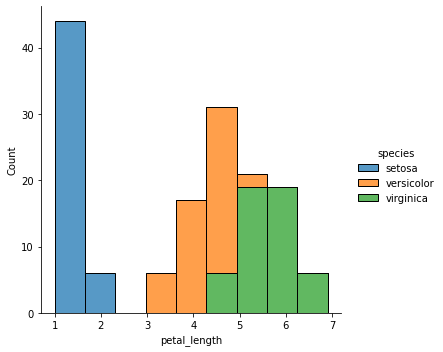

In [93]:
sns.displot(data=iris_df, x='petal_length', hue='species', multiple='stack')